<a href="https://colab.research.google.com/github/mekazanc/Data-Visualization/blob/master/visualizeWithPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization with Pandas Dataframe

In this code, I will make some exploratory analysis by using pandas dataframe. I created dataframe randomly but it would be better to use a real data to make visualization. 

Load Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
plt.style.use('seaborn')
# Options : ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

Create Data to be explored. I created data randomly. You can use real data here. 

In [24]:
#Firstly, create an array for 3 years. 
dates = np.arange(np.datetime64('2018-01-01'), np.datetime64('2020-12-31')).astype(str)

In [25]:
#Then, create a Product and Category array 
products = []
types = []
options = [1,2,3]


for i in range(1,601):
    products.append('Product_' + str(i))
    tmp = np.random.choice(options,1)
    if tmp == 1:
     types.append('Red')
    elif tmp == 2:
     types.append('Green')
    else:
     types.append('Blue')
    
print(products[:5])
print(types[:5])

['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']
['Green', 'Green', 'Green', 'Green', 'Green']


In [26]:
# Create an array for the items to be sold. 
size = [len(products), len(dates)]
data = np.random.randint(100, size=(size[0],size[1]))
data=data.astype(float)

# Merge these data. 
d1 = np.concatenate((np.array(products).reshape(-1,1), np.array(types).reshape(-1,1)), axis=1)
print(d1.shape)

# Merge all numpy arrays. 
d2 = np.concatenate((d1, data), axis=1)
print(d2.shape)

(600, 2)
(600, 1097)


In [27]:
# We will need more detailed time information so that add more columns such as month, year, days_week
df_dates = pd.DataFrame()
df_dates['dates'] = dates.tolist()
df_dates['days_week'] = pd.to_datetime(df_dates['dates'], format='%Y-%m-%d').dt.day_name()
df_dates['month'] = pd.to_datetime(df_dates['dates'], format='%Y-%m-%d').dt.month
df_dates['year'] = pd.to_datetime(df_dates['dates'], format='%Y-%m-%d').dt.year
df_dates.head()

,dates,days_week,month,year
0,2018-01-01,Monday,1,2018
1,2018-01-02,Tuesday,1,2018
2,2018-01-03,Wednesday,1,2018
3,2018-01-04,Thursday,1,2018
4,2018-01-05,Friday,1,2018


In [28]:
# Now, convert them into the pandas dataframe. 
cols = ['Products', 'Categories']
dates_ = dates.tolist()
df = pd.DataFrame(data=d2, columns= cols + dates_)
print("Final Data Shape : {}".format(df.shape))
df.head()


Final Data Shape : (600, 1097)


,Products,Categories,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,2018-01-11,2018-01-12,2018-01-13,2018-01-14,2018-01-15,2018-01-16,2018-01-17,2018-01-18,2018-01-19,2018-01-20,2018-01-21,2018-01-22,2018-01-23,2018-01-24,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-03,2018-02-04,2018-02-05,2018-02-06,2018-02-07,...,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
0,Product_1,Green,12.0,49.0,7.0,28.0,17.0,70.0,99.0,0.0,52.0,13.0,57.0,83.0,94.0,91.0,41.0,93.0,36.0,62.0,0.0,55.0,96.0,89.0,16.0,28.0,68.0,6.0,5.0,8.0,50.0,82.0,26.0,1.0,71.0,37.0,81.0,99.0,53.0,12.0,...,1.0,91.0,13.0,1.0,37.0,79.0,57.0,42.0,80.0,50.0,66.0,83.0,94.0,47.0,59.0,68.0,42.0,22.0,27.0,24.0,31.0,7.0,13.0,49.0,31.0,37.0,44.0,23.0,42.0,75.0,54.0,6.0,91.0,17.0,32.0,91.0,19.0,0.0,87.0,2.0
1,Product_2,Green,11.0,57.0,33.0,18.0,70.0,75.0,51.0,16.0,82.0,91.0,80.0,72.0,47.0,94.0,53.0,71.0,31.0,53.0,4.0,85.0,30.0,70.0,34.0,9.0,97.0,61.0,47.0,81.0,75.0,50.0,17.0,92.0,64.0,72.0,64.0,7.0,58.0,19.0,...,96.0,59.0,83.0,95.0,86.0,46.0,41.0,74.0,19.0,31.0,55.0,86.0,53.0,86.0,79.0,79.0,41.0,73.0,88.0,78.0,68.0,12.0,71.0,86.0,60.0,99.0,36.0,15.0,70.0,75.0,82.0,79.0,23.0,79.0,88.0,86.0,66.0,81.0,81.0,62.0
2,Product_3,Green,47.0,18.0,15.0,19.0,82.0,19.0,76.0,38.0,38.0,46.0,83.0,31.0,26.0,44.0,71.0,9.0,85.0,75.0,61.0,82.0,46.0,18.0,74.0,20.0,1.0,21.0,5.0,66.0,4.0,54.0,39.0,86.0,0.0,84.0,23.0,18.0,63.0,48.0,...,7.0,90.0,32.0,13.0,3.0,84.0,93.0,52.0,51.0,87.0,20.0,56.0,18.0,80.0,72.0,55.0,62.0,26.0,98.0,96.0,20.0,6.0,68.0,97.0,82.0,26.0,22.0,36.0,45.0,23.0,85.0,74.0,44.0,99.0,57.0,24.0,9.0,36.0,47.0,30.0
3,Product_4,Green,77.0,84.0,35.0,66.0,37.0,61.0,87.0,83.0,52.0,44.0,37.0,89.0,24.0,58.0,17.0,3.0,15.0,93.0,34.0,84.0,63.0,93.0,86.0,52.0,44.0,1.0,14.0,88.0,23.0,71.0,45.0,64.0,28.0,39.0,11.0,89.0,48.0,1.0,...,36.0,79.0,22.0,74.0,66.0,43.0,55.0,86.0,78.0,80.0,27.0,64.0,23.0,56.0,80.0,59.0,50.0,43.0,1.0,42.0,59.0,34.0,9.0,18.0,99.0,77.0,57.0,6.0,50.0,61.0,65.0,79.0,89.0,38.0,5.0,55.0,94.0,15.0,5.0,39.0
4,Product_5,Green,32.0,14.0,97.0,18.0,45.0,45.0,41.0,81.0,48.0,79.0,16.0,1.0,98.0,63.0,16.0,42.0,9.0,55.0,7.0,9.0,57.0,90.0,48.0,63.0,59.0,31.0,15.0,63.0,43.0,26.0,11.0,33.0,8.0,80.0,27.0,17.0,3.0,74.0,...,93.0,23.0,84.0,13.0,36.0,35.0,88.0,29.0,69.0,60.0,9.0,83.0,84.0,24.0,44.0,72.0,11.0,16.0,55.0,63.0,25.0,19.0,59.0,99.0,89.0,36.0,43.0,79.0,74.0,97.0,54.0,57.0,52.0,82.0,27.0,81.0,32.0,71.0,84.0,73.0


In [29]:
# Some columns seem an object. Convert them into numeric version. 
for i in df.iloc[:, 2:].columns.tolist():
    df[i] = pd.to_numeric(df[i])

In [30]:
df.head()

,Products,Categories,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,2018-01-11,2018-01-12,2018-01-13,2018-01-14,2018-01-15,2018-01-16,2018-01-17,2018-01-18,2018-01-19,2018-01-20,2018-01-21,2018-01-22,2018-01-23,2018-01-24,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-03,2018-02-04,2018-02-05,2018-02-06,2018-02-07,...,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
0,Product_1,Green,12.0,49.0,7.0,28.0,17.0,70.0,99.0,0.0,52.0,13.0,57.0,83.0,94.0,91.0,41.0,93.0,36.0,62.0,0.0,55.0,96.0,89.0,16.0,28.0,68.0,6.0,5.0,8.0,50.0,82.0,26.0,1.0,71.0,37.0,81.0,99.0,53.0,12.0,...,1.0,91.0,13.0,1.0,37.0,79.0,57.0,42.0,80.0,50.0,66.0,83.0,94.0,47.0,59.0,68.0,42.0,22.0,27.0,24.0,31.0,7.0,13.0,49.0,31.0,37.0,44.0,23.0,42.0,75.0,54.0,6.0,91.0,17.0,32.0,91.0,19.0,0.0,87.0,2.0
1,Product_2,Green,11.0,57.0,33.0,18.0,70.0,75.0,51.0,16.0,82.0,91.0,80.0,72.0,47.0,94.0,53.0,71.0,31.0,53.0,4.0,85.0,30.0,70.0,34.0,9.0,97.0,61.0,47.0,81.0,75.0,50.0,17.0,92.0,64.0,72.0,64.0,7.0,58.0,19.0,...,96.0,59.0,83.0,95.0,86.0,46.0,41.0,74.0,19.0,31.0,55.0,86.0,53.0,86.0,79.0,79.0,41.0,73.0,88.0,78.0,68.0,12.0,71.0,86.0,60.0,99.0,36.0,15.0,70.0,75.0,82.0,79.0,23.0,79.0,88.0,86.0,66.0,81.0,81.0,62.0
2,Product_3,Green,47.0,18.0,15.0,19.0,82.0,19.0,76.0,38.0,38.0,46.0,83.0,31.0,26.0,44.0,71.0,9.0,85.0,75.0,61.0,82.0,46.0,18.0,74.0,20.0,1.0,21.0,5.0,66.0,4.0,54.0,39.0,86.0,0.0,84.0,23.0,18.0,63.0,48.0,...,7.0,90.0,32.0,13.0,3.0,84.0,93.0,52.0,51.0,87.0,20.0,56.0,18.0,80.0,72.0,55.0,62.0,26.0,98.0,96.0,20.0,6.0,68.0,97.0,82.0,26.0,22.0,36.0,45.0,23.0,85.0,74.0,44.0,99.0,57.0,24.0,9.0,36.0,47.0,30.0
3,Product_4,Green,77.0,84.0,35.0,66.0,37.0,61.0,87.0,83.0,52.0,44.0,37.0,89.0,24.0,58.0,17.0,3.0,15.0,93.0,34.0,84.0,63.0,93.0,86.0,52.0,44.0,1.0,14.0,88.0,23.0,71.0,45.0,64.0,28.0,39.0,11.0,89.0,48.0,1.0,...,36.0,79.0,22.0,74.0,66.0,43.0,55.0,86.0,78.0,80.0,27.0,64.0,23.0,56.0,80.0,59.0,50.0,43.0,1.0,42.0,59.0,34.0,9.0,18.0,99.0,77.0,57.0,6.0,50.0,61.0,65.0,79.0,89.0,38.0,5.0,55.0,94.0,15.0,5.0,39.0
4,Product_5,Green,32.0,14.0,97.0,18.0,45.0,45.0,41.0,81.0,48.0,79.0,16.0,1.0,98.0,63.0,16.0,42.0,9.0,55.0,7.0,9.0,57.0,90.0,48.0,63.0,59.0,31.0,15.0,63.0,43.0,26.0,11.0,33.0,8.0,80.0,27.0,17.0,3.0,74.0,...,93.0,23.0,84.0,13.0,36.0,35.0,88.0,29.0,69.0,60.0,9.0,83.0,84.0,24.0,44.0,72.0,11.0,16.0,55.0,63.0,25.0,19.0,59.0,99.0,89.0,36.0,43.0,79.0,74.0,97.0,54.0,57.0,52.0,82.0,27.0,81.0,32.0,71.0,84.0,73.0


In [31]:
# We need more discriminative color effect so let's multiply products with a color-specific scalar. 
# This takes some time. You may improve that part by your coding skills :)

lim = df.shape[0]
for i in range(0, lim):
 if df.iloc[i,1] == 'Red':
  df.iloc[i,2:] = df.iloc[i,2:].values*2
 elif df.iloc[i,1] == 'Green':
  df.iloc[i,2:] = df.iloc[i,2:].values/2
 else: 
  pass


If you have data, you can skipp above operations. I will share finalized dataframe of mine below and please try to your dataframe. 

In [32]:
df.head()

,Products,Categories,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,2018-01-11,2018-01-12,2018-01-13,2018-01-14,2018-01-15,2018-01-16,2018-01-17,2018-01-18,2018-01-19,2018-01-20,2018-01-21,2018-01-22,2018-01-23,2018-01-24,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-03,2018-02-04,2018-02-05,2018-02-06,2018-02-07,...,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
0,Product_1,Green,6.0,24.5,3.5,14.0,8.5,35.0,49.5,0.0,26.0,6.5,28.5,41.5,47.0,45.5,20.5,46.5,18.0,31.0,0.0,27.5,48.0,44.5,8.0,14.0,34.0,3.0,2.5,4.0,25.0,41.0,13.0,0.5,35.5,18.5,40.5,49.5,26.5,6.0,...,0.5,45.5,6.5,0.5,18.5,39.5,28.5,21.0,40.0,25.0,33.0,41.5,47.0,23.5,29.5,34.0,21.0,11.0,13.5,12.0,15.5,3.5,6.5,24.5,15.5,18.5,22.0,11.5,21.0,37.5,27.0,3.0,45.5,8.5,16.0,45.5,9.5,0.0,43.5,1.0
1,Product_2,Green,5.5,28.5,16.5,9.0,35.0,37.5,25.5,8.0,41.0,45.5,40.0,36.0,23.5,47.0,26.5,35.5,15.5,26.5,2.0,42.5,15.0,35.0,17.0,4.5,48.5,30.5,23.5,40.5,37.5,25.0,8.5,46.0,32.0,36.0,32.0,3.5,29.0,9.5,...,48.0,29.5,41.5,47.5,43.0,23.0,20.5,37.0,9.5,15.5,27.5,43.0,26.5,43.0,39.5,39.5,20.5,36.5,44.0,39.0,34.0,6.0,35.5,43.0,30.0,49.5,18.0,7.5,35.0,37.5,41.0,39.5,11.5,39.5,44.0,43.0,33.0,40.5,40.5,31.0
2,Product_3,Green,23.5,9.0,7.5,9.5,41.0,9.5,38.0,19.0,19.0,23.0,41.5,15.5,13.0,22.0,35.5,4.5,42.5,37.5,30.5,41.0,23.0,9.0,37.0,10.0,0.5,10.5,2.5,33.0,2.0,27.0,19.5,43.0,0.0,42.0,11.5,9.0,31.5,24.0,...,3.5,45.0,16.0,6.5,1.5,42.0,46.5,26.0,25.5,43.5,10.0,28.0,9.0,40.0,36.0,27.5,31.0,13.0,49.0,48.0,10.0,3.0,34.0,48.5,41.0,13.0,11.0,18.0,22.5,11.5,42.5,37.0,22.0,49.5,28.5,12.0,4.5,18.0,23.5,15.0
3,Product_4,Green,38.5,42.0,17.5,33.0,18.5,30.5,43.5,41.5,26.0,22.0,18.5,44.5,12.0,29.0,8.5,1.5,7.5,46.5,17.0,42.0,31.5,46.5,43.0,26.0,22.0,0.5,7.0,44.0,11.5,35.5,22.5,32.0,14.0,19.5,5.5,44.5,24.0,0.5,...,18.0,39.5,11.0,37.0,33.0,21.5,27.5,43.0,39.0,40.0,13.5,32.0,11.5,28.0,40.0,29.5,25.0,21.5,0.5,21.0,29.5,17.0,4.5,9.0,49.5,38.5,28.5,3.0,25.0,30.5,32.5,39.5,44.5,19.0,2.5,27.5,47.0,7.5,2.5,19.5
4,Product_5,Green,16.0,7.0,48.5,9.0,22.5,22.5,20.5,40.5,24.0,39.5,8.0,0.5,49.0,31.5,8.0,21.0,4.5,27.5,3.5,4.5,28.5,45.0,24.0,31.5,29.5,15.5,7.5,31.5,21.5,13.0,5.5,16.5,4.0,40.0,13.5,8.5,1.5,37.0,...,46.5,11.5,42.0,6.5,18.0,17.5,44.0,14.5,34.5,30.0,4.5,41.5,42.0,12.0,22.0,36.0,5.5,8.0,27.5,31.5,12.5,9.5,29.5,49.5,44.5,18.0,21.5,39.5,37.0,48.5,27.0,28.5,26.0,41.0,13.5,40.5,16.0,35.5,42.0,36.5


Visualization Tasks

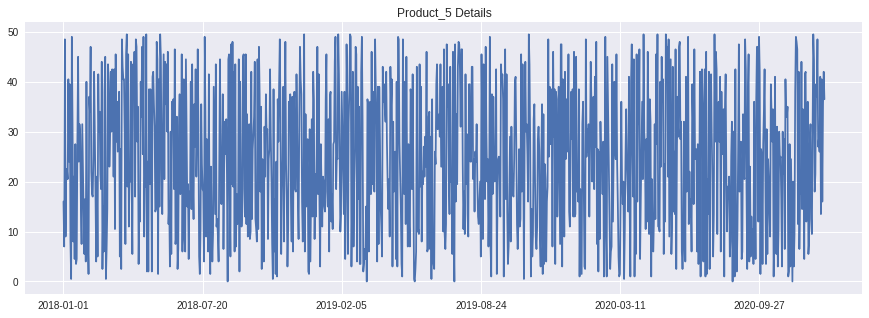

In [33]:
# Procedure is simple. Select an item. Assign index column and receive dateinformation. 

pname = 'Product_5'

df.loc[df['Products'] == pname] \
    .set_index('Products')[dates_] \
    .T.plot(figsize=(15, 5),
          title=pname + ' Details',
          color=next(color_cycle))

plt.legend('')
plt.show()

# Note that I created randomized array so the plot seems noisy. It is better to use more realistic data. 

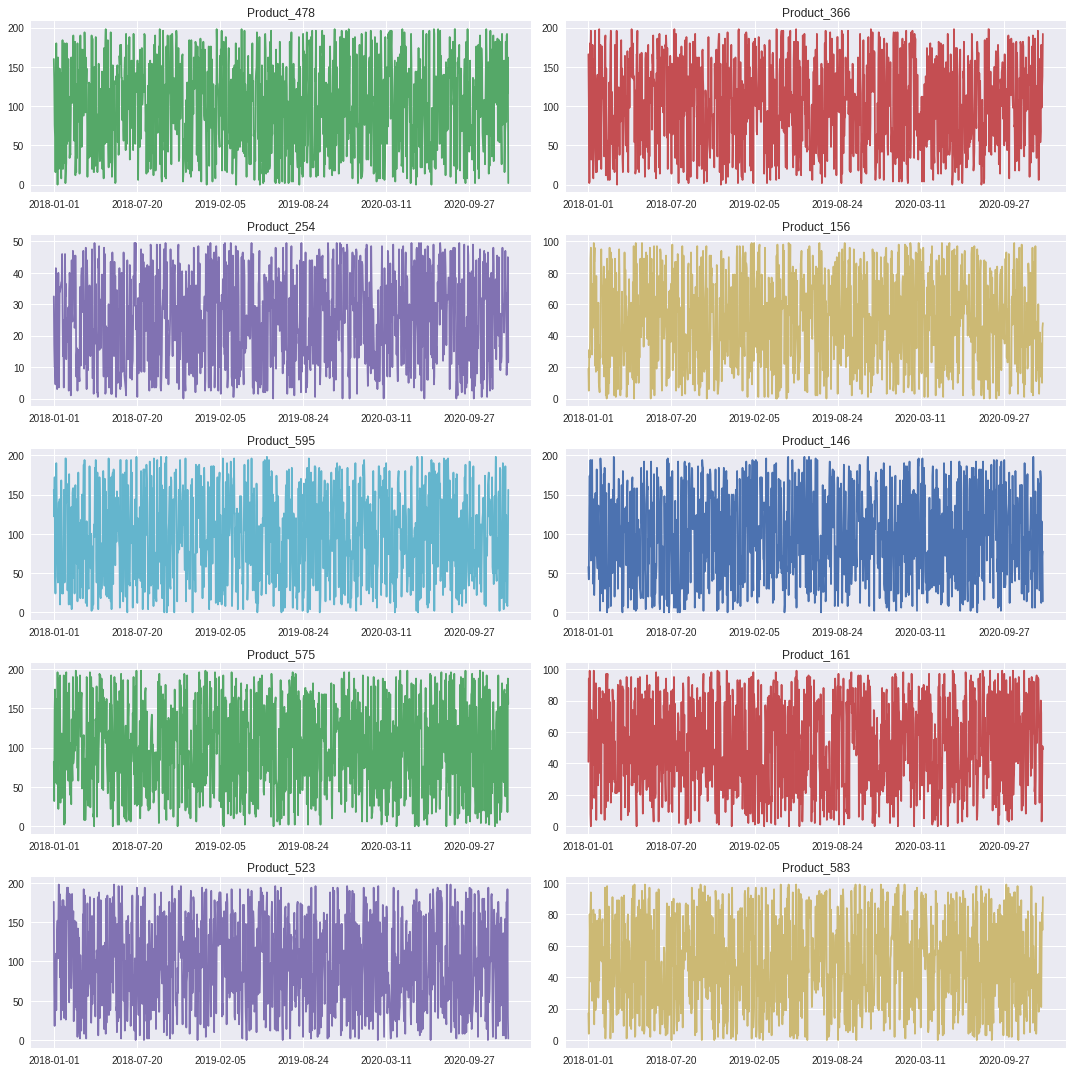

In [34]:
# Above graph shows 1 figure. Also, you can display more figures like below. 
# Create a dataframe that receives 10 product randomly and plots them. 

ten_products = df.sample(10, random_state=529) \
        .set_index('Products')[dates_].T 


fig, axs = plt.subplots(5, 2, figsize=(15, 15))
axs = axs.flatten()
ax_idx = 0
for item in ten_products.columns:
    ten_products[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()


Displaying Different Time Information

In [35]:
df_dates.head()

,dates,days_week,month,year
0,2018-01-01,Monday,1,2018
1,2018-01-02,Tuesday,1,2018
2,2018-01-03,Wednesday,1,2018
3,2018-01-04,Thursday,1,2018
4,2018-01-05,Friday,1,2018


In [36]:
# Select an item from the dataframe. 
pname = 'Product_5'
tmpDF = df.loc[df['Products'] == pname].set_index('Products')[dates_].T

# Reset Index
tmpDF.reset_index(inplace = True)

# Rename Columns
tmpDF.columns = ['dates',pname]

# Merge with tmpDataframe
tmpDF = pd.merge(tmpDF, df_dates, on='dates', how = 'left')

tmpDF.head()



,dates,Product_5,days_week,month,year
0,2018-01-01,16.0,Monday,1,2018
1,2018-01-02,7.0,Tuesday,1,2018
2,2018-01-03,48.5,Wednesday,1,2018
3,2018-01-04,9.0,Thursday,1,2018
4,2018-01-05,22.5,Friday,1,2018


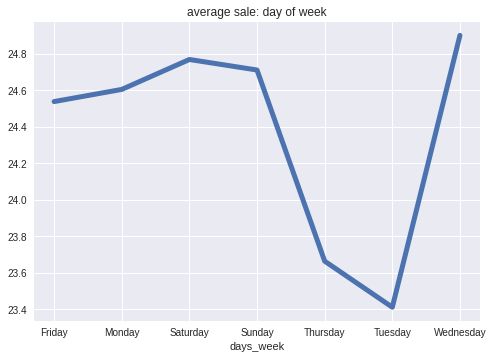

In [37]:
# Group by using days_week. 
tmpDF.groupby('days_week').mean()[pname] \
    .plot(kind='line',
          title='average sale: day of week',
          lw=5,
          color=color_pal[0])

In [38]:
# We can apply more graphs. Let's select 3 products randomly and display in three different ways. 
three_products = df.sample(3, random_state=529) \
        .set_index('Products')[dates_].T 

# Reset Index
three_products.reset_index(inplace = True)

# Change Index Column Name to merge with time dataframe
three_products = three_products.rename(columns={'index': 'dates'})

# Merge with time dataframe 
three_products = pd.merge(three_products, df_dates, on='dates', how = 'left')

three_products.head()

,dates,Product_478,Product_366,Product_254,days_week,month,year
0,2018-01-01,160.0,166.0,32.5,Monday,1,2018
1,2018-01-02,134.0,106.0,17.0,Tuesday,1,2018
2,2018-01-03,76.0,2.0,10.0,Wednesday,1,2018
3,2018-01-04,60.0,4.0,10.5,Thursday,1,2018
4,2018-01-05,16.0,180.0,4.5,Friday,1,2018


In [39]:
# Note that sorting days of week in appropriate order is important.
# Replace them with a number. 

three_products['days_week'].replace({'Sunday':1,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6,'Saturday':7}, inplace = True)


In [40]:
three_products.head()

,dates,Product_478,Product_366,Product_254,days_week,month,year
0,2018-01-01,160.0,166.0,32.5,2,1,2018
1,2018-01-02,134.0,106.0,17.0,3,1,2018
2,2018-01-03,76.0,2.0,10.0,4,1,2018
3,2018-01-04,60.0,4.0,10.5,5,1,2018
4,2018-01-05,16.0,180.0,4.5,6,1,2018


In [41]:
# You can simply look at days_week results. 
three_products.groupby('days_week').mean()

,Product_478,Product_366,Product_254,month,year
days_week,,,,,
1,100.256410,96.589744,24.147436,6.570513,2019.000000
2,103.121019,97.847134,26.108280,6.560510,2018.993631
3,104.802548,101.566879,24.910828,6.515924,2019.000000
4,92.038217,101.923567,25.477707,6.471338,2019.006369
5,102.961538,101.025641,25.025641,6.467949,2019.000000
6,94.525641,103.730769,27.778846,6.500000,2019.000000
7,98.064103,105.576923,23.269231,6.532051,2019.000000


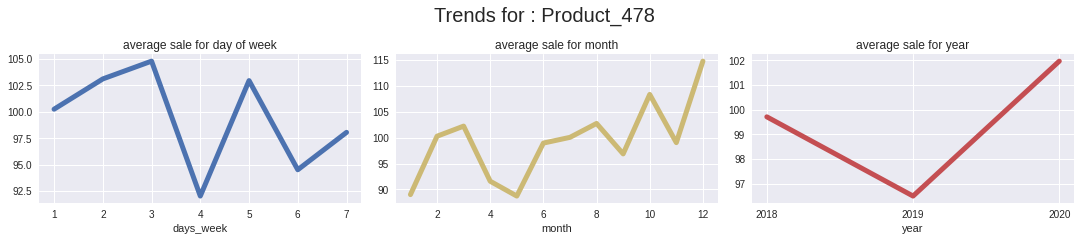

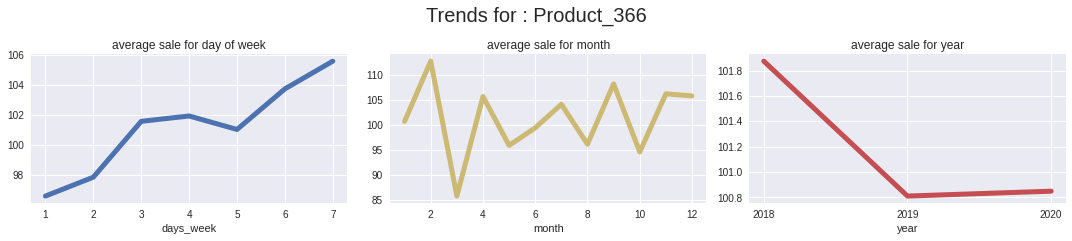

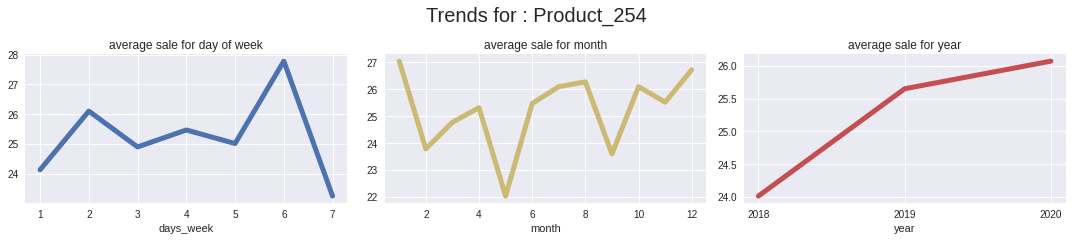

In [42]:
examples = ['Product_478','Product_366','Product_254']
yearRange = np.arange(2018, 2021,1)

for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    three_products.groupby('days_week').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale for day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    three_products.groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale for month',
              lw=5,
              color=color_pal[4],
              ax=ax2)
    
    three_products.groupby('year').mean()[examples[i]] \
    .plot(kind='line',
          lw=5,
          title='average sale for year',
          color=color_pal[2],
          ax=ax3,
          xticks = yearRange
         )


    fig.suptitle(f'Trends for : {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

Finally, display product type information

In [43]:
# Add Product and Category information. 
df['Products_Cat'] =  df['Products'] + '_' + df['Categories']

df2 = df.set_index('Products_Cat')[dates_].T
df2.head()

Products_Cat,Product_1_Green,Product_2_Green,Product_3_Green,Product_4_Green,Product_5_Green,Product_6_Blue,Product_7_Red,Product_8_Blue,Product_9_Blue,Product_10_Red,Product_11_Red,Product_12_Blue,Product_13_Blue,Product_14_Blue,Product_15_Blue,Product_16_Blue,Product_17_Blue,Product_18_Green,Product_19_Blue,Product_20_Green,Product_21_Red,Product_22_Green,Product_23_Red,Product_24_Green,Product_25_Green,Product_26_Green,Product_27_Red,Product_28_Blue,Product_29_Red,Product_30_Red,Product_31_Red,Product_32_Green,Product_33_Green,Product_34_Green,Product_35_Blue,Product_36_Red,Product_37_Red,Product_38_Red,Product_39_Green,Product_40_Green,...,Product_561_Red,Product_562_Red,Product_563_Green,Product_564_Blue,Product_565_Red,Product_566_Red,Product_567_Red,Product_568_Blue,Product_569_Blue,Product_570_Green,Product_571_Green,Product_572_Red,Product_573_Green,Product_574_Blue,Product_575_Red,Product_576_Red,Product_577_Blue,Product_578_Blue,Product_579_Red,Product_580_Green,Product_581_Green,Product_582_Blue,Product_583_Blue,Product_584_Blue,Product_585_Red,Product_586_Red,Product_587_Green,Product_588_Red,Product_589_Blue,Product_590_Green,Product_591_Green,Product_592_Blue,Product_593_Green,Product_594_Red,Product_595_Red,Product_596_Green,Product_597_Blue,Product_598_Blue,Product_599_Green,Product_600_Green
2018-01-01,6.0,5.5,23.5,38.5,16.0,28.0,56.0,15.0,82.0,8.0,76.0,87.0,32.0,55.0,1.0,39.0,81.0,47.0,92.0,2.5,14.0,12.5,136.0,7.0,18.0,33.5,66.0,23.0,88.0,142.0,44.0,8.5,49.5,34.0,53.0,132.0,158.0,66.0,6.5,32.5,...,156.0,106.0,23.5,38.0,176.0,48.0,64.0,68.0,52.0,14.0,6.0,84.0,22.0,67.0,82.0,4.0,78.0,33.0,82.0,32.5,43.0,43.0,17.0,53.0,186.0,178.0,45.5,40.0,8.0,22.0,18.5,27.0,24.5,26.0,156.0,9.0,4.0,51.0,31.0,42.0
2018-01-02,24.5,28.5,9.0,42.0,7.0,25.0,142.0,47.0,11.0,122.0,120.0,20.0,38.0,32.0,85.0,6.0,3.0,26.0,43.0,48.5,70.0,43.0,6.0,31.5,25.5,47.0,8.0,93.0,122.0,178.0,180.0,30.5,20.0,2.0,50.0,174.0,60.0,166.0,17.0,11.0,...,90.0,66.0,43.5,97.0,38.0,184.0,198.0,4.0,57.0,11.0,24.5,82.0,27.5,18.0,32.0,86.0,93.0,12.0,42.0,23.5,17.0,50.0,4.0,37.0,52.0,44.0,46.0,94.0,85.0,31.0,29.5,31.0,14.5,0.0,122.0,26.5,26.0,24.0,16.0,29.5
2018-01-03,3.5,16.5,7.5,17.5,48.5,4.0,178.0,46.0,51.0,102.0,122.0,42.0,41.0,70.0,65.0,94.0,75.0,18.0,68.0,29.5,58.0,20.5,144.0,37.5,23.5,19.5,112.0,83.0,60.0,180.0,16.0,6.5,26.0,36.0,53.0,52.0,52.0,148.0,0.0,26.0,...,58.0,30.0,20.0,28.0,182.0,164.0,70.0,47.0,95.0,44.5,35.5,192.0,36.5,75.0,148.0,174.0,7.0,34.0,42.0,45.0,16.0,2.0,34.0,48.0,34.0,184.0,6.5,80.0,45.0,25.5,11.5,85.0,19.0,50.0,172.0,28.0,63.0,24.0,25.5,27.0
2018-01-04,14.0,9.0,9.5,33.0,9.0,60.0,130.0,23.0,21.0,122.0,184.0,7.0,55.0,76.0,15.0,91.0,16.0,12.5,57.0,47.0,96.0,8.0,34.0,40.5,14.0,28.5,88.0,87.0,98.0,178.0,114.0,40.0,11.5,46.5,40.0,180.0,106.0,94.0,16.0,7.5,...,4.0,80.0,20.0,57.0,62.0,140.0,110.0,87.0,4.0,38.0,28.0,32.0,35.0,44.0,174.0,118.0,31.0,73.0,178.0,10.5,43.0,25.0,80.0,45.0,150.0,174.0,8.5,32.0,7.0,29.5,44.5,29.0,0.5,180.0,58.0,37.5,40.0,58.0,0.0,18.5
2018-01-05,8.5,35.0,41.0,18.5,22.5,83.0,180.0,83.0,55.0,124.0,46.0,87.0,97.0,27.0,95.0,56.0,30.0,2.0,54.0,4.5,6.0,34.0,60.0,6.5,4.0,1.0,102.0,94.0,74.0,98.0,52.0,34.5,32.0,11.0,61.0,92.0,50.0,4.0,19.5,1.5,...,78.0,196.0,30.5,63.0,196.0,96.0,2.0,47.0,49.0,6.5,10.5,192.0,9.0,99.0,56.0,138.0,83.0,75.0,30.0,11.5,26.0,47.0,60.0,67.0,40.0,30.0,48.0,0.0,56.0,49.0,31.5,36.0,10.0,54.0,24.0,42.5,12.0,86.0,12.0,28.5


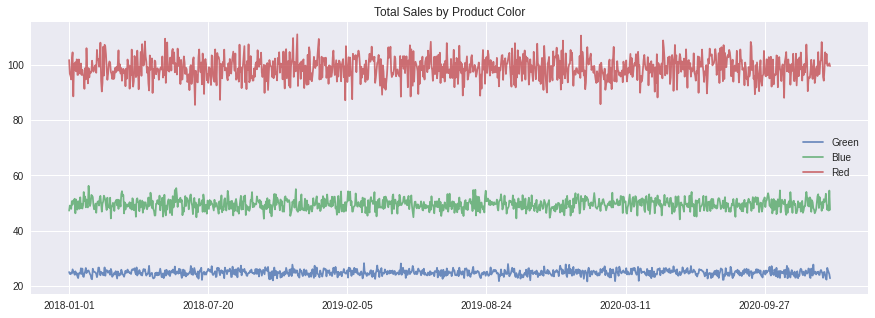

In [44]:
# In the below graph, we will sum the number of sell for each color. 
# We consider all products in this plot. 

for i in df['Categories'].unique():
    items_col = [c for c in df2.columns if i in c]
    df2[items_col] \
        .mean(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Product Color')
plt.legend(df['Categories'].unique())
plt.show()